In [1]:
import os
from scipy.fft import fft, ifft
import numpy as np
import pandas as pd
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
# file_dir = r'/Users/rubi/Desktop/Action_Control_Lab/typ_project/typing_task_data/s262_there_reps'
save_dir = r'/Users/rubi/Desktop/Github/typingexp/typing_task_analysis/'\
           'figures/'
file_dir = r'/Volumes/greenhouse/typingtask_data/testing/s262_there_trials'
os.chdir(file_dir)\

files = glob.glob("*.csv")

In [3]:
files.sort(key=lambda s: s.split('_')[6])
# files.remove('prediction_0.7.013_s262_01232024_aerial_trial_196.analysis.csv')
# files.remove('prediction_0.7.006_s262_01232024_aerial_trial_3.analysis.csv')
files

['prediction_0.7.004_s262_01232024_aerial_trial_101.analysis.csv',
 'prediction_0.7.005_s262_01232024_aerial_trial_109.analysis.csv',
 'prediction_0.7.016_s262_01232024_aerial_trial_121.analysis.csv',
 'prediction_0.7.017_s262_01232024_aerial_trial_136.analysis.csv',
 'prediction_0.7.018_s262_01232024_aerial_trial_139.analysis.csv',
 'prediction_0.7.019_s262_01232024_aerial_trial_179.analysis.csv',
 'prediction_0.7.020_s262_01232024_aerial_trial_213.analysis.csv',
 'prediction_0.7.001_s262_01232024_aerial_trial_23.analysis.csv',
 'prediction_0.7.002_s262_01232024_aerial_trial_56.analysis.csv',
 'prediction_0.7.003_s262_01232024_aerial_trial_86.analysis.csv']

In [4]:
df_list = []
for file in files:
    df = pd.read_csv(file)
    df.insert(1, 'trial', file[46:49])
    df_list.append(df)

# Concatenate all DataFrames
there_trials = pd.concat(df_list, ignore_index=True)

there_trials
## track_0 == right hand & track_1 == left hand

,track,trial,frame_idx,instance.score,2_nail.x,2_nail.y,2_nail.score,3_nail.x,3_nail.y,3_nail.score,...,2_mcp.score,3_mcp.x,3_mcp.y,3_mcp.score,4_mcp.x,4_mcp.y,4_mcp.score,5_mcp.x,5_mcp.y,5_mcp.score
0,track_1,101,0,1.009407,1476.924683,658.270447,0.989096,1567.863647,690.267578,0.982981,...,0.930434,1643.984741,433.652283,0.953824,1680.014893,434.348907,0.998360,1700.375366,442.360748,0.955543
1,track_0,101,0,0.925737,1301.757080,650.193237,0.958566,1242.452637,697.843933,0.966101,...,0.959500,1126.613037,441.778229,0.982115,1090.547363,454.069183,0.988945,1066.780029,465.651611,0.957723
2,track_1,101,1,1.022449,1477.020264,658.788940,0.963986,1568.138550,690.903687,0.998753,...,0.968366,1644.166626,431.457062,0.960548,1680.237427,434.976807,1.013088,1700.695435,443.052307,0.987754
3,track_0,101,1,0.934411,1299.030884,650.391357,0.968764,1242.584473,698.026367,0.968058,...,0.982804,1126.725830,441.977875,0.978344,1090.630371,454.260040,1.000436,1066.843018,465.888794,0.960335
4,track_1,101,2,0.984021,1477.788330,658.750916,0.980782,1565.897583,690.868652,1.002269,...,0.972342,1641.968384,431.354309,0.978737,1681.056641,434.993042,0.998085,1701.499512,442.972473,1.014728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,track_0,86.,417,0.824655,1300.961182,658.955933,1.071190,1245.643188,702.848267,0.989412,...,1.014471,1132.988892,446.992371,0.952938,1097.208740,458.972137,1.006442,1073.315308,470.568665,1.016435
8396,track_1,86.,418,0.923989,1475.000854,662.720703,0.968403,1555.182129,698.917358,1.001958,...,1.009883,1631.294312,438.887665,0.971317,1666.675781,442.629730,0.952584,1686.633179,450.735962,0.975397
8397,track_0,86.,418,0.836438,1298.910767,661.713135,1.059276,1246.685547,702.821777,0.980594,...,0.981214,1131.074219,446.857605,0.974419,1095.318359,461.775940,0.987532,1074.343628,470.559387,1.000588
8398,track_1,86.,419,0.881879,1475.036865,662.803711,0.977577,1555.096436,698.915894,0.997211,...,1.016587,1631.100586,438.946533,0.960659,1666.686890,442.691345,0.952950,1686.716919,450.829163,1.004418


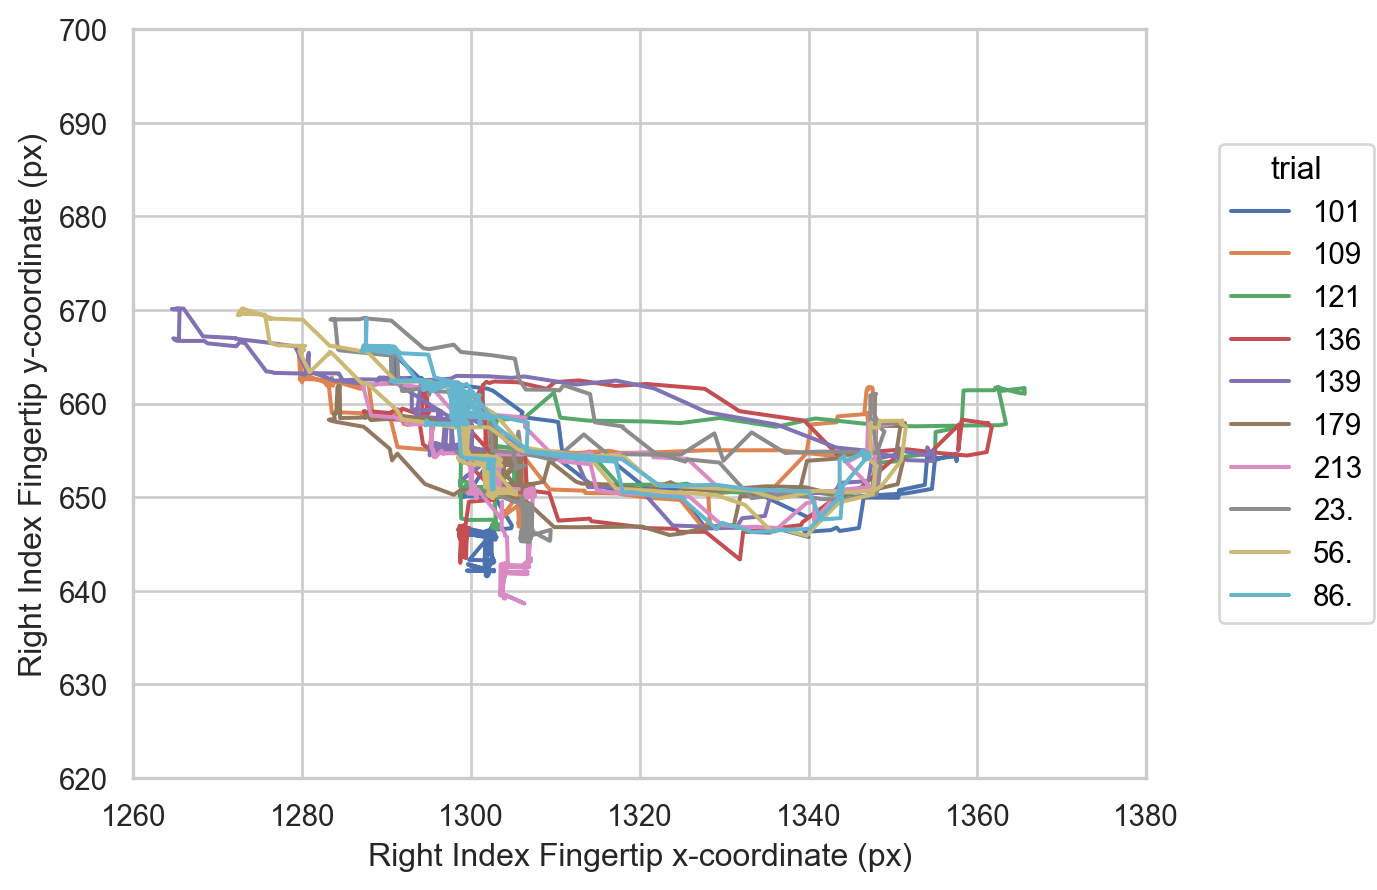

In [5]:
there_trials_0 = there_trials[there_trials['track'] == 'track_0']
there_trials_1 = there_trials[there_trials['track'] == 'track_1']

from seaborn import axes_style
so.Plot.config.theme.update(axes_style("whitegrid"))

p = (so.Plot(there_trials_0, "2_nail.x", "2_nail.y", color='trial')
     .add(so.Path())
     .limit(x=(1260, 1380), y=(620, 700))
)

p.label(x="Right Index Fingertip x-coordinate (px)",
        y="Right Index Fingertip y-coordinate (px)")

# p.save(save_dir + 'there_2nail_xy.png', dpi=300)

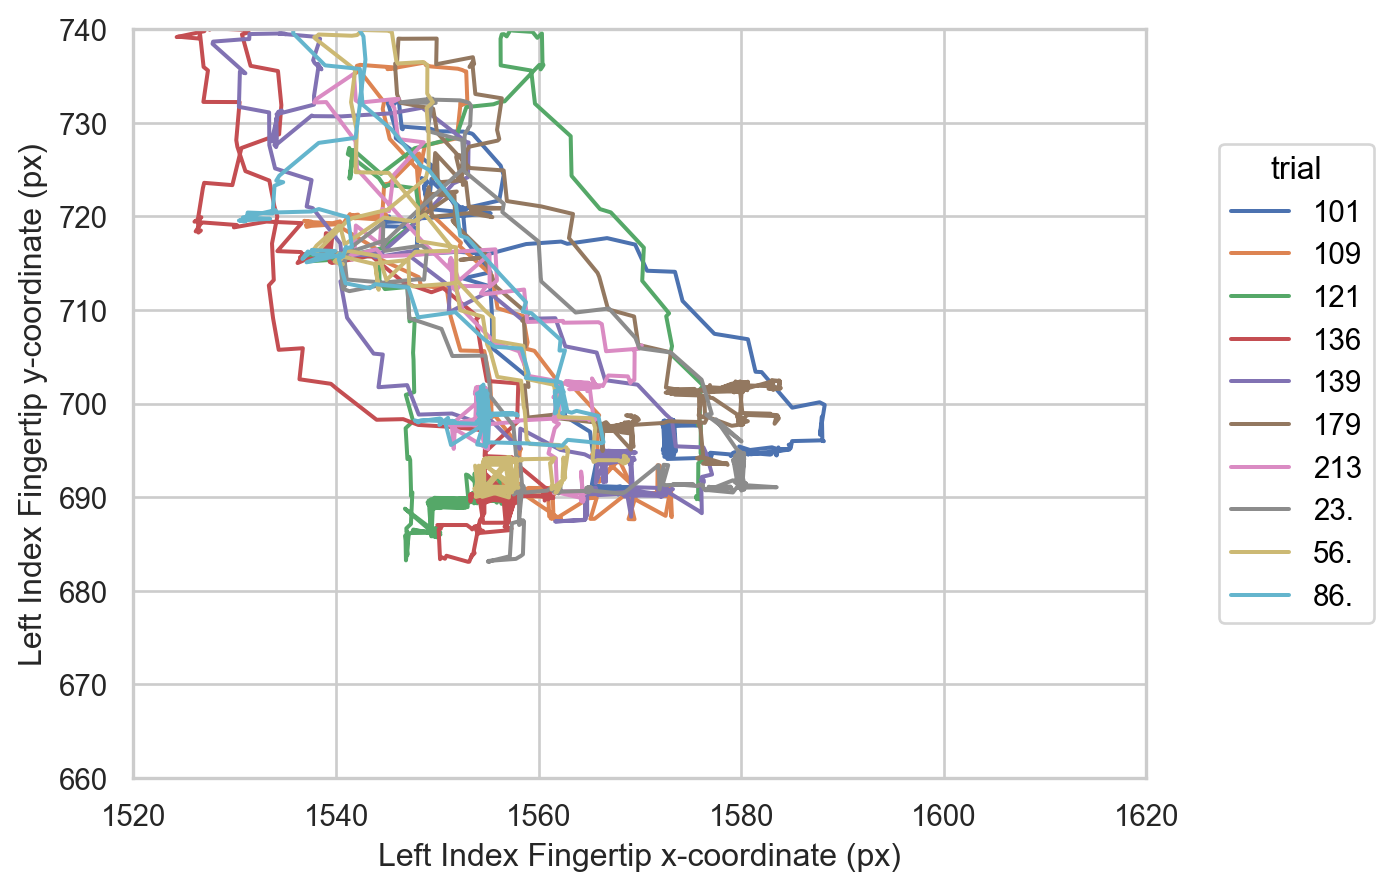

In [6]:
from seaborn import axes_style
so.Plot.config.theme.update(axes_style("whitegrid"))

p = (so.Plot(there_trials_1, "3_nail.x", "3_nail.y", color='trial')
     .add(so.Path())
     .limit(x=(1520, 1620), y=(660, 740))
)

p.label(x="Left Index Fingertip x-coordinate (px)", 
        y="Left Index Fingertip y-coordinate (px)")

# p.save(save_dir + 'heond_3nail_xy.png', dpi=300)

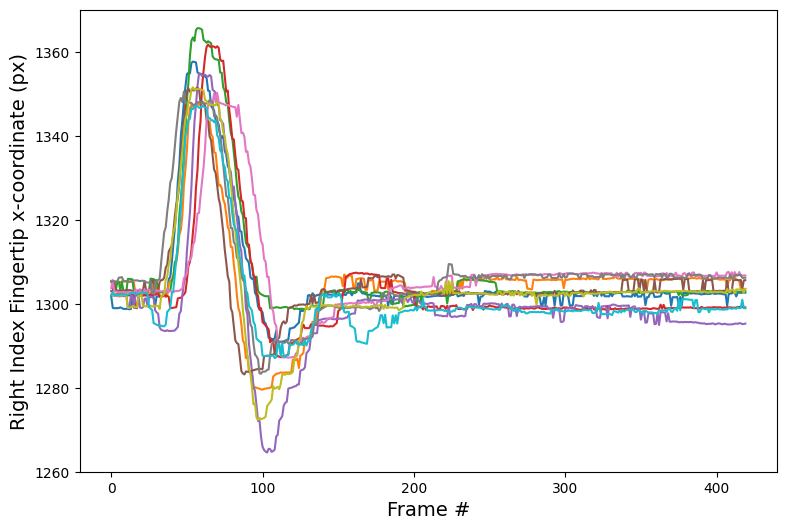

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x='frame_idx', y="2_nail.x", hue='trial',
             data=there_trials_0, legend=False)

ax.set(
    xlabel='Frame #', 
    ylabel='Right Index Fingertip x-coordinate (px)',
    ylim=(1260, 1370)
)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

plt.savefig(save_dir + 'there_x.png', dpi=300)

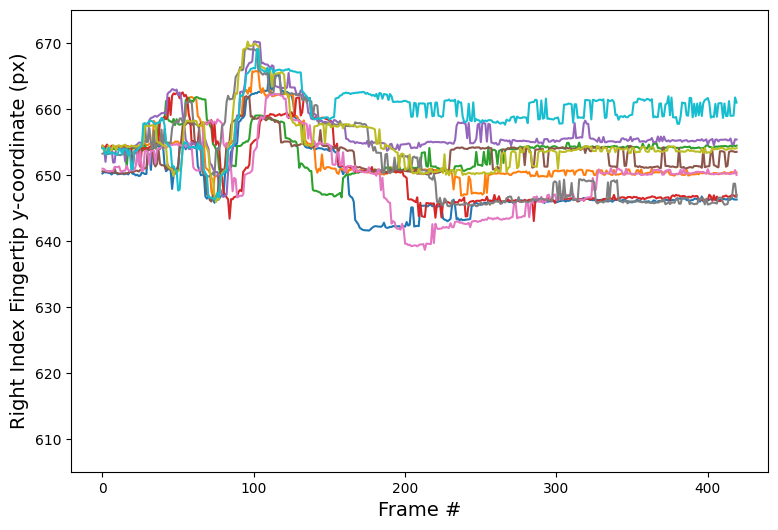

In [8]:
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x='frame_idx', y="2_nail.y", hue='trial',
             data=there_trials_0, legend=False)

ax.set(
    xlabel='Frame #', 
    ylabel='Right Index Fingertip y-coordinate (px)',
    ylim=(605, 675)
)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

plt.savefig(save_dir + 'there_y.png', dpi=300)

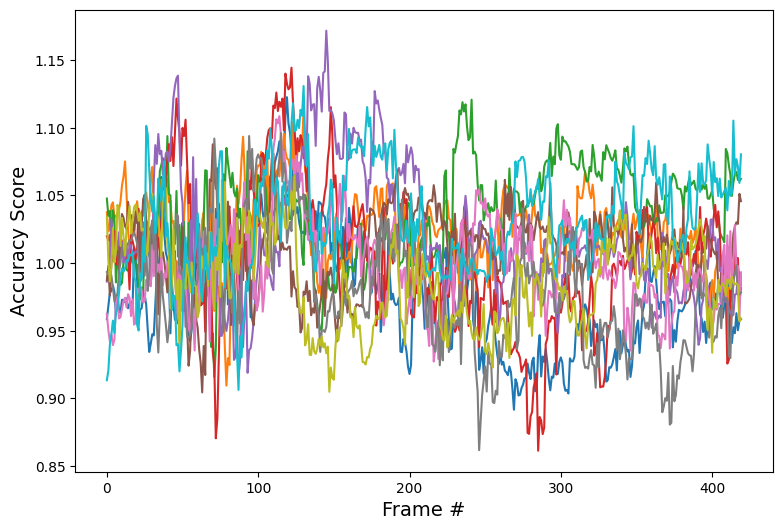

In [9]:
fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(x='frame_idx', y='2_nail.score', hue='trial',
             data=there_trials_0, legend=False)

ax.set(
    xlabel='Frame #', 
    ylabel='Accuracy Score',
)

ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

# plt.savefig(save_dir + 'heond_score.png', dpi=300)

/var/folders/42/sqkdrmx52wgfnxt8ycz1hhlc0000gn/T/ipykernel_67455/1197652800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  there_trials_0['velocity_diff'] = abs(there_trials_0['2_nail.x'].diff())/420


<Axes: xlabel='frame_idx', ylabel='velocity_diff'>

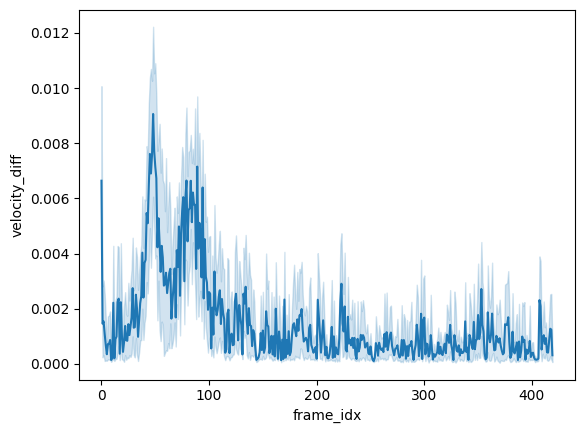

In [10]:
there_trials_0['velocity_diff'] = abs(there_trials_0['2_nail.x'].diff())/420
sns.lineplot(x='frame_idx', y='velocity_diff',
             data=there_trials_0)

## Trajectory variability testing

In [11]:
there_trials_0

mean_test = there_trials_0.groupby(['frame_idx']).agg({'2_nail.x':'mean', '2_nail.y':'mean'}).reset_index(drop=True)
mean_test = mean_test.rename(columns={'2_nail.x':'2_nail.x_mean', '2_nail.y':'2_nail.y_mean'})

def diff_eq():
    
# there_trials_0.groupby('frame_idx')

SyntaxError: incomplete input (871718343.py, line 8)